### Chapter 1 Data Understanding
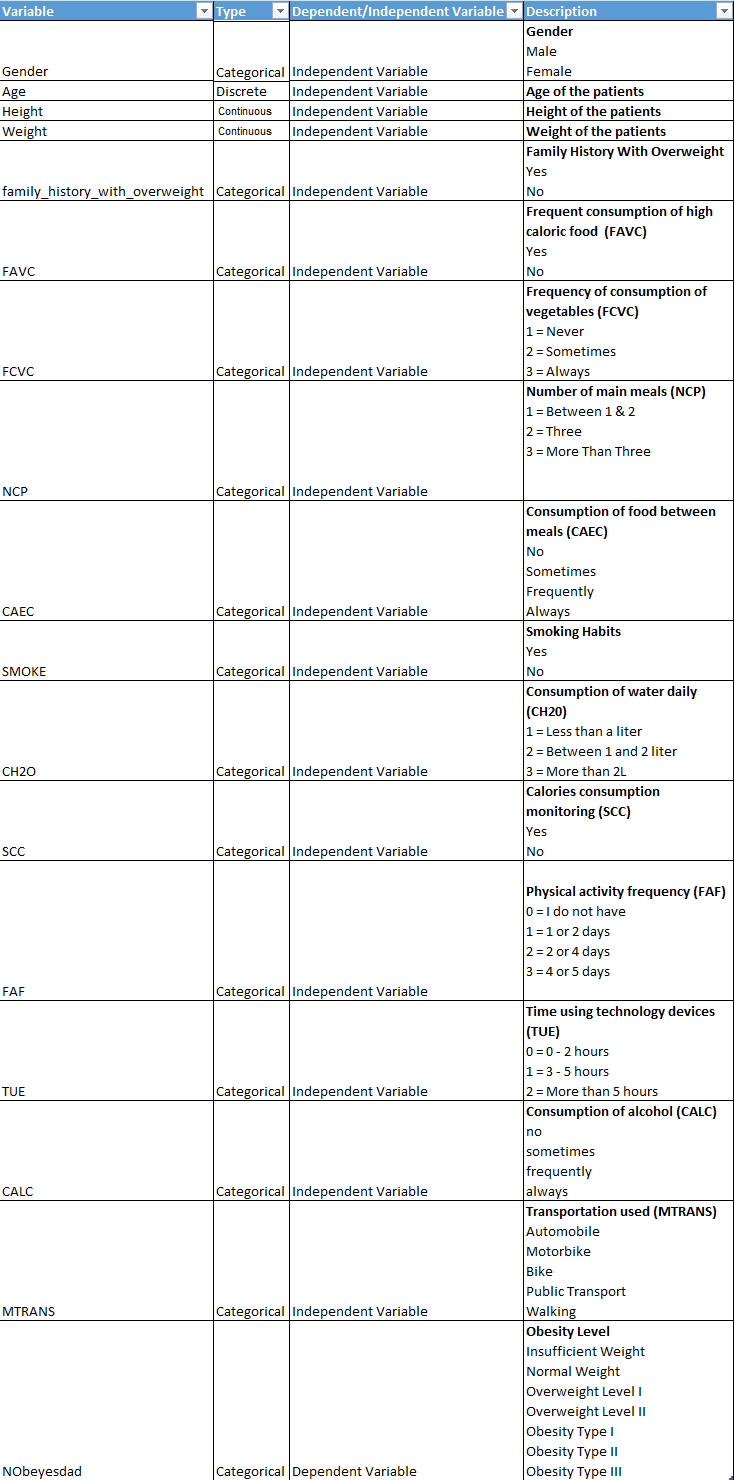

### Chapter 2 - Setup Package Import & Reading Data Into DataFrame

In [1]:
!pip install keras
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn

In [2]:
### Package Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from operator import add
%matplotlib inline

In [3]:
# Read Data Into DataFrame
df = pd.read_csv('csv_result-ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

id  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   1  Female  21.0    1.62    64.0                            yes   no   2.0   
1   2  Female  21.0    1.52    56.0                            yes   no   3.0   
2   3    Male  23.0    1.80    77.0                            yes   no   2.0   
3   4    Male  27.0    1.80    87.0                             no   no   3.0   
4   5    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [4]:
print(f'Dataset contains {df.shape[0]} samples, {df.shape[1] - 1} independent features 1 target continuous variable.')

Dataset contains 2042 samples, 17 independent features 1 target continuous variable.


### Chapter 3 Basic Data Analysis

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2042 non-null   int64  
 1   Gender                          2042 non-null   object 
 2   Age                             2042 non-null   float64
 3   Height                          2042 non-null   float64
 4   Weight                          2042 non-null   float64
 5   family_history_with_overweight  2042 non-null   object 
 6   FAVC                            2042 non-null   object 
 7   FCVC                            2042 non-null   float64
 8   NCP                             2042 non-null   float64
 9   CAEC                            2042 non-null   object 
 10  SMOKE                           2042 non-null   object 
 11  CH2O                            2042 non-null   float64
 12  SCC                             20

In [6]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
dup = df[df.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {df.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 2042 entries in this dataset.


In [8]:
df.describe()

id          Age       Height       Weight         FCVC  \
count  2042.000000  2042.000000  2042.000000  2042.000000  2042.000000   
mean   1078.788932    24.443290     1.700603    87.410253     2.421756   
std     605.389664     6.332122     0.093021    26.145130     0.531755   
min       1.000000    14.000000     1.450000    39.000000     1.000000   
25%     559.250000    20.000000     1.629454    67.906408     2.000000   
50%    1090.500000    22.886910     1.700000    83.869140     2.392665   
75%    1600.750000    26.000000     1.767037   108.375369     3.000000   
max    2111.000000    61.000000     1.980000   173.000000     3.000000   

               NCP         CH2O          FAF          TUE  
count  2042.000000  2042.000000  2042.000000  2042.000000  
mean      2.641215     2.006367     0.989104     0.658070  
std       0.751952     0.612954     0.842589     0.605821  
min       1.000000     1.000000     0.000000     0.000000  
25%       2.608145     1.568145     0.115520     0.000000  
50%       3.000000     2.000000     1.000000     0.626629  
75%       3.000000     2.480485     1.600510     1.000000  
max       3.999591     3.000000     3.000000     2.000000

In [9]:
print(np.char.center(" Unique values of categorical variables ", 60, fillchar = "*"))
print("\ngender: ", df.Gender.unique())
print("Age: ", df.Age.unique())
print("Height: ", df.Height.unique())
print("Weight: ", df.Weight.unique())
print("Family_history_with_overweight: ", sorted(df.family_history_with_overweight.unique()))
print("FAVC: ", sorted(df.FAVC.unique()))
print("FCVC: ", sorted(df.FCVC.unique()))
print("NCP: ", sorted(df.NCP.unique()))
print("CAEC: ", sorted(df.CAEC.unique()))
print("SMOKE: ", sorted(df.SMOKE.unique()))
print("CH2O: ", sorted(df.CH2O.unique()))
print("SCC: ", sorted(df.SCC.unique()))
print("TUE: ", sorted(df.TUE.unique()))
print("CALC: ", sorted(df.CALC.unique()))
print("MTRANS: ", sorted(df.MTRANS.unique()))
print("NObeyesdad: ", sorted(df.NObeyesdad.unique()))

********** Unique values of categorical variables **********

gender:  ['Female' 'Male']
Age:  [21.       23.       27.       ... 22.524036 24.361936 23.664709]
Height:  [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Weight:  [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
Family_history_with_overweight:  ['no', 'yes']
FAVC:  ['no', 'yes']
FCVC:  [1.0, 1.003566, 1.00876, 1.031149, 1.036159, 1.036414, 1.052699, 1.053534, 1.063449, 1.064162, 1.067909, 1.078529, 1.081585, 1.0816, 1.096455, 1.108663, 1.116068, 1.118436, 1.122127, 1.123672, 1.133844, 1.140615, 1.142468, 1.164062, 1.168856, 1.188089, 1.202075, 1.203754, 1.204855, 1.206276, 1.212908, 1.21498, 1.220024, 1.261288, 1.263216, 1.264234, 1.270448, 1.276858, 1.27785, 1.289315, 1.303878, 1.306844, 1.31415, 1.317729, 1.321028, 1.3307, 1.34138, 1.362441, 1.368978, 1.369529, 1.387489, 1.392665, 1.397468, 1.412566, 1.428289, 1.431346, 1.443674, 1.450218, 1.451337, 1.452524, 1.455602, 1.457758, 1.46938

### Chapter 4 Detailed Data Analysis

In [10]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = df[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

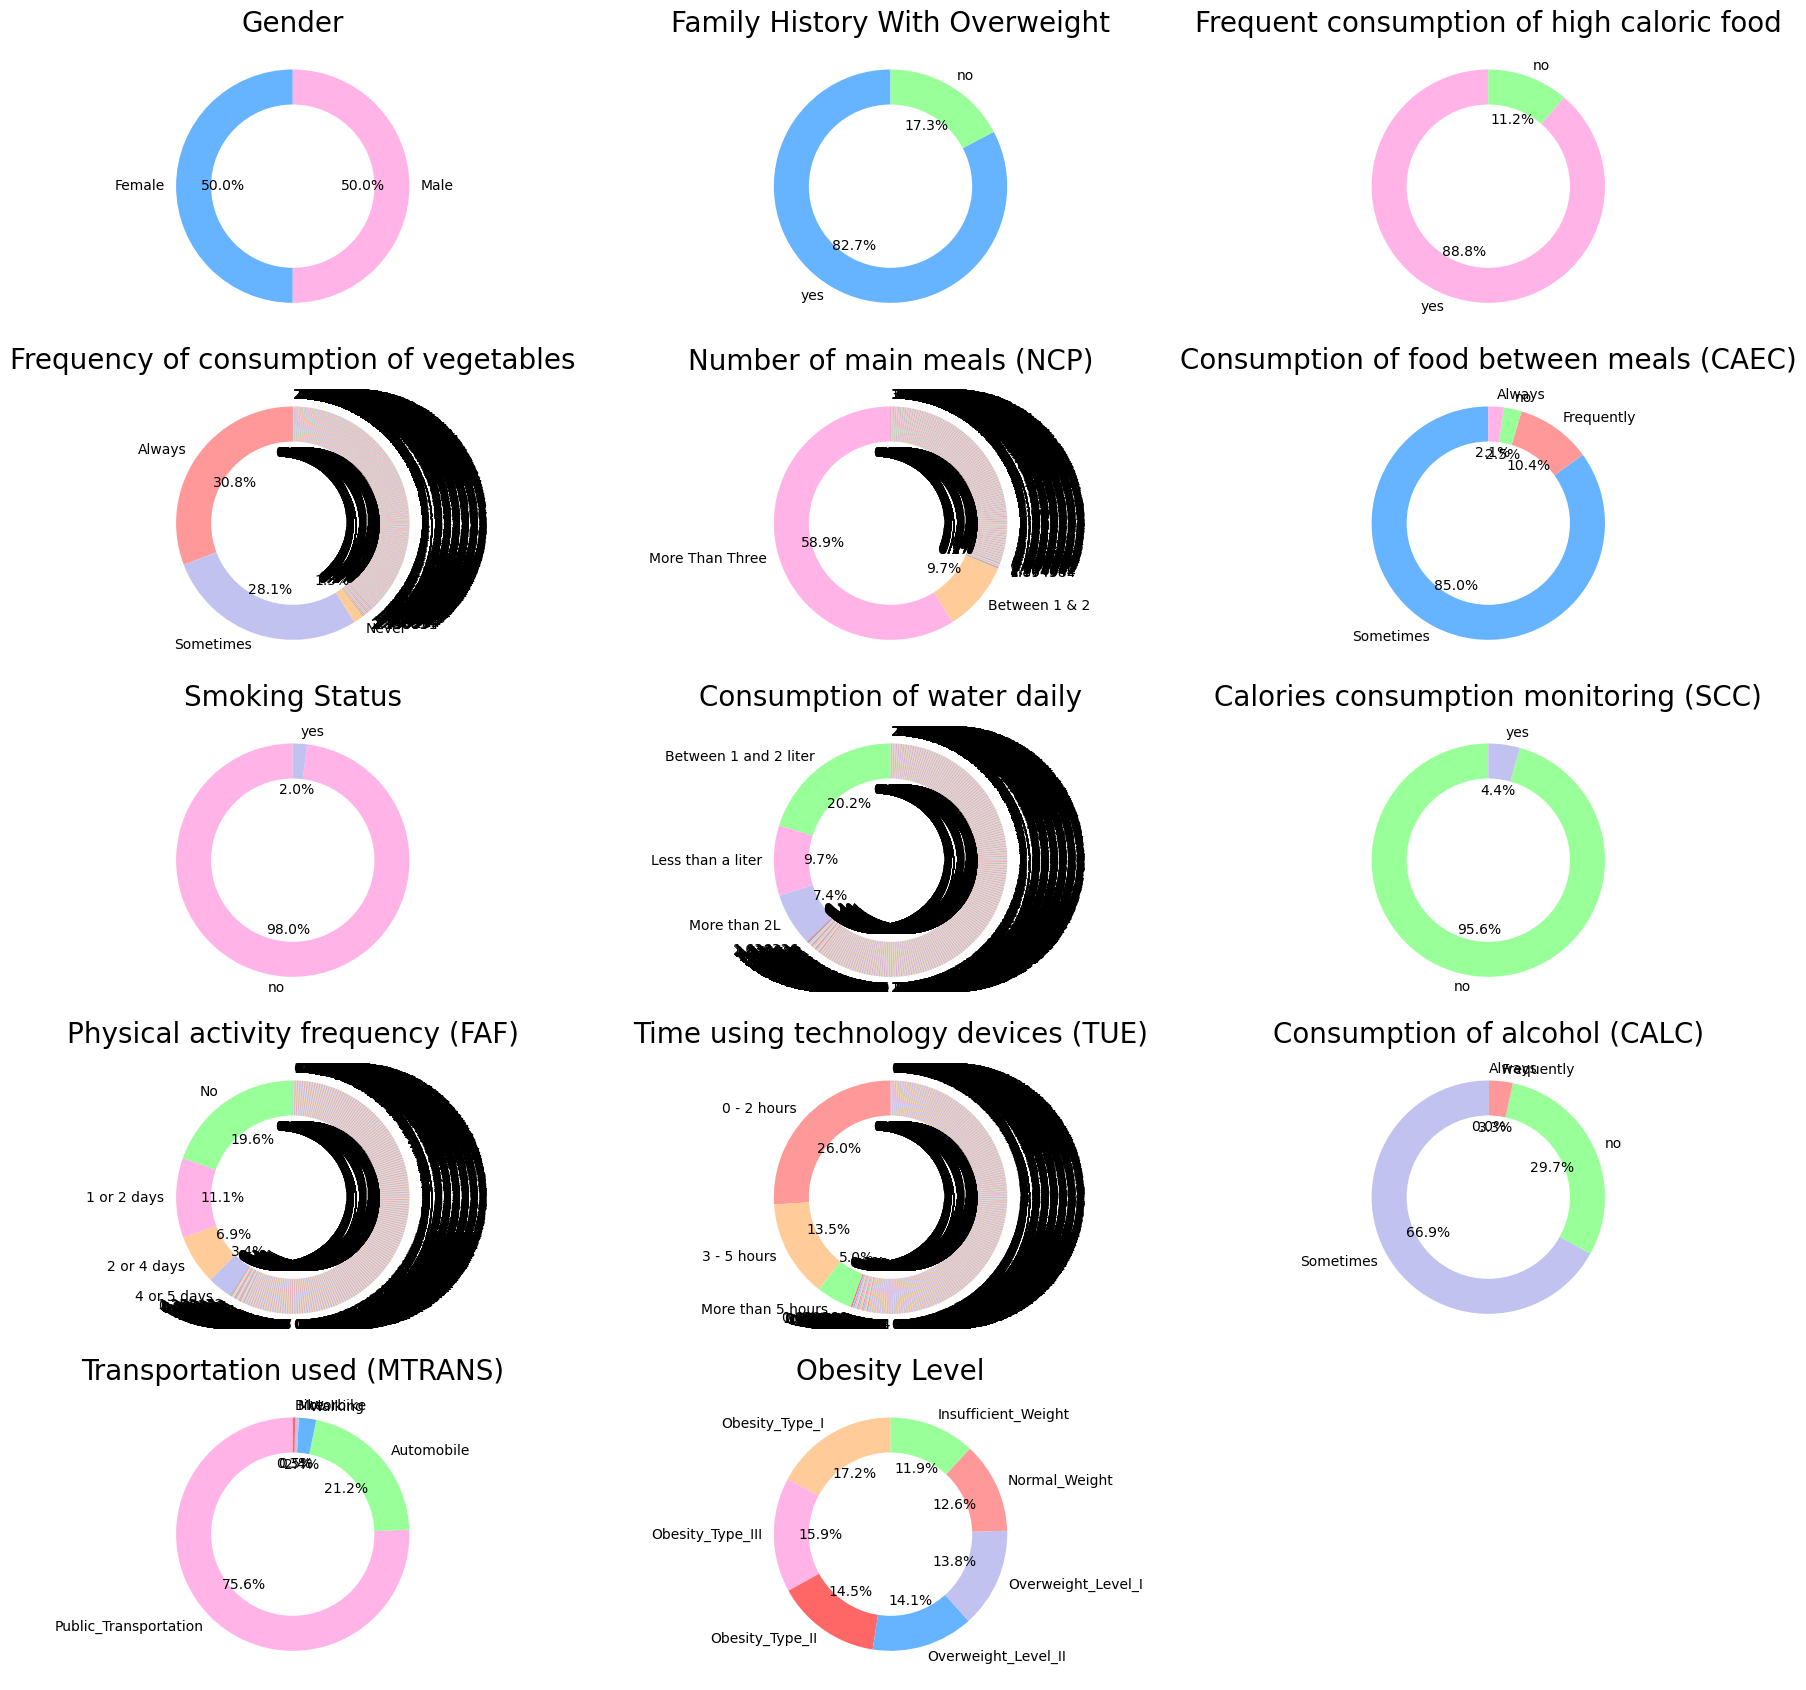

In [11]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 5
grid_cols = 3

# Draw Gender Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(df, 'Gender', fig, {'Female': 'Female', 'Male': 'Male'}, 'Gender')

# Draw Family History With Overweight Pie chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(df, 'family_history_with_overweight', fig, {'No':'No', 'Yes':'Yes'}, 'Family History With Overweight')

# Draw FAVC Pie chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(df, 'FAVC', fig, {'No':'No', 'Yes':'Yes'}, 'Frequent consumption of high caloric food')

# Draw FCVC Pie chart
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(df, 'FCVC', fig, {1:'Never', 2:'Sometimes', 3:'Always'}, 'Frequency of consumption of vegetables')

# Draw NCP Pie chart
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(df, 'NCP', fig, {1: 'Between 1 & 2', 2: 'Three', 3: 'More Than Three'}, 'Number of main meals (NCP)')

# Draw CAEC Type Pie chart
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(df, 'CAEC', fig, {'No':'No', 'Sometimes':'Sometimes','Frequently':'Frequently','Always':'Always'}, 'Consumption of food between meals (CAEC)')

# Draw Smoking Status Pie chart
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(df, 'SMOKE', fig, {'No':'No', 'Yes':'Yes'}, 'Smoking Status')

# Draw Consumption of water daily Pie chart
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(df, 'CH2O', fig, {1: 'Less than a liter', 2: 'Between 1 and 2 liter', 3: 'More than 2L'}, 'Consumption of water daily')

# Draw Calories consumption monitoring (SCC) Pie chart
plt.subplot(grid_rows, grid_cols, 9)
draw_semi_pie_chart(df, 'SCC', fig, {'No':'No', 'Yes':'Yes'}, 'Calories consumption monitoring (SCC)')

# Draw Physical activity frequency (FAF) Pie chart
plt.subplot(grid_rows, grid_cols, 10)
draw_semi_pie_chart(df, 'FAF', fig, {0: 'No', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}, 'Physical activity frequency (FAF)')

# Draw Time using technology devices (TUE) Pie chart
plt.subplot(grid_rows, grid_cols, 11)
draw_semi_pie_chart(df, 'TUE', fig, {0: '0 - 2 hours', 1: '3 - 5 hours', 2: 'More than 5 hours'}, 'Time using technology devices (TUE)')

# Draw Consumption of alcohol (CALC) Pie chart
plt.subplot(grid_rows, grid_cols, 12)
draw_semi_pie_chart(df, 'CALC', fig, {'No': 'No', 'Sometimes':'Sometimes', 'Frequently': 'Frequently', 'Always': 'Always'}, 'Consumption of alcohol (CALC)')

# Draw Transportation used (MTRANS) Pie chart
plt.subplot(grid_rows, grid_cols, 13)
draw_semi_pie_chart(df, 'MTRANS', fig, {'Automobile':'Automobile', 'Motorbike':'Motorbike','Bike':'Bike','Public Transport':'Public Transport', 'Walking':'Walking'}, 'Transportation used (MTRANS)')

# Draw Obesity Level Pie chart
plt.subplot(grid_rows, grid_cols, 14)
draw_semi_pie_chart(df, 'NObeyesdad', fig, {'Insufficient Weight':'Insufficient Weight', 'Normal Weight':'Normal Weight', 'Overweight Level I':'Overweight Level I', 'Overweight Level II':'Overweight Level II', 'Obesity Type I':'Obesity Type I', 'Obesity Type II':'Obesity Type II', 'Obesity Type III':'Obesity Type III'}, 'Obesity Level')


fig.tight_layout()
plt.show()

As we can see from the above piechart, 
there are several piechart that are facing problem due to them having decimal values, 
therefore we will need to remove them manually on the data processing chapter.

### Chapter 5 Data Preprocessing

In [12]:
### Removing Decimals
df[['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = df[['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].astype(int)

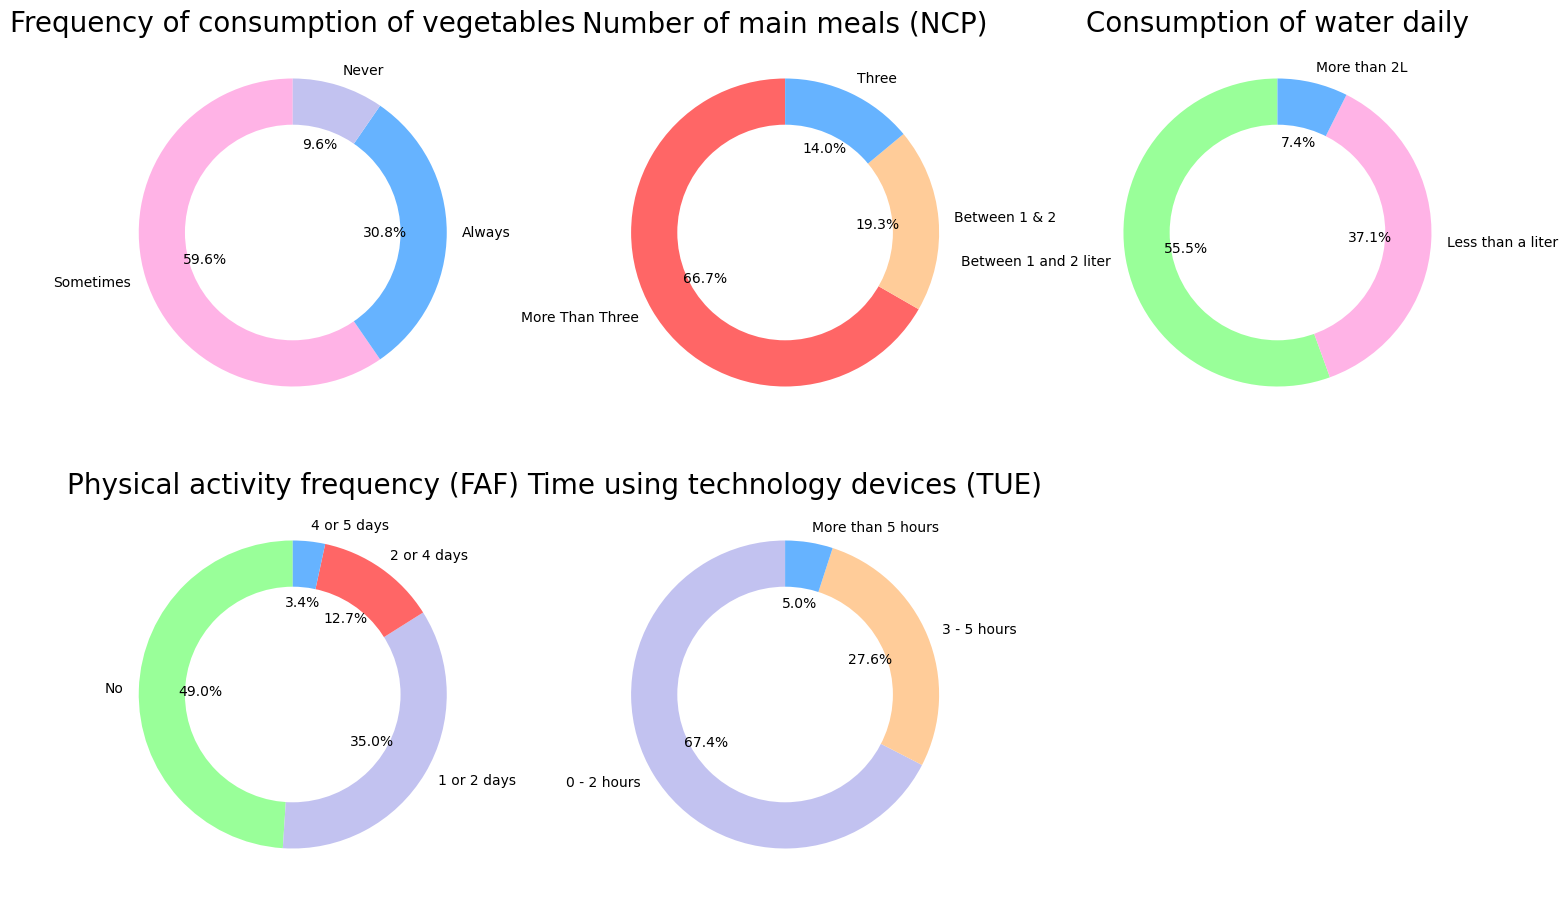

In [13]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

### Graph After Removing Decimals
# Draw FCVC Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(df, 'FCVC', fig, {1:'Never', 2:'Sometimes', 3:'Always'}, 'Frequency of consumption of vegetables')

# Draw NCP Pie chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(df, 'NCP', fig, {1: 'Between 1 & 2', 2: 'Three', 3: 'More Than Three'}, 'Number of main meals (NCP)')

# Draw Consumption of water daily Pie chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(df, 'CH2O', fig, {1: 'Less than a liter', 2: 'Between 1 and 2 liter', 3: 'More than 2L'}, 'Consumption of water daily')

# Draw Physical activity frequency (FAF) Pie chart
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(df, 'FAF', fig, {0: 'No', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}, 'Physical activity frequency (FAF)')

# Draw Time using technology devices (TUE) Pie chart
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(df, 'TUE', fig, {0: '0 - 2 hours', 1: '3 - 5 hours', 2: 'More than 5 hours'}, 'Time using technology devices (TUE)')

In [14]:
### Remove Unrelated Data
### ID Has no predictive power just a unique identifier so removable
df.drop(labels=['id'], axis=1, inplace=True)
df

Gender  Age    Height      Weight family_history_with_overweight FAVC  \
0     Female   21  1.620000   64.000000                            yes   no   
1     Female   21  1.520000   56.000000                            yes   no   
2       Male   23  1.800000   77.000000                            yes   no   
3       Male   27  1.800000   87.000000                             no   no   
4       Male   22  1.780000   89.800000                             no   no   
...      ...  ...       ...         ...                            ...  ...   
2037  Female   20  1.710730  131.408528                            yes  yes   
2038  Female   21  1.748584  133.742943                            yes  yes   
2039  Female   22  1.752206  133.689352                            yes  yes   
2040  Female   24  1.739450  133.346641                            yes  yes   
2041  Female   23  1.738836  133.472641                            yes  yes   

      FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0        2    3  Sometimes    no     2   no    0    1          no   
1        3    3  Sometimes   yes     3  yes    3    0   Sometimes   
2        2    3  Sometimes    no     2   no    2    1  Frequently   
3        3    3  Sometimes    no     2   no    2    0  Frequently   
4        2    1  Sometimes    no     2   no    0    0   Sometimes   
...    ...  ...        ...   ...   ...  ...  ...  ...         ...   
2037     3    3  Sometimes    no     1   no    1    0   Sometimes   
2038     3    3  Sometimes    no     2   no    1    0   Sometimes   
2039     3    3  Sometimes    no     2   no    1    0   Sometimes   
2040     3    3  Sometimes    no     2   no    1    0   Sometimes   
2041     3    3  Sometimes    no     2   no    1    0   Sometimes   

                     MTRANS           NObeyesdad  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2037  Public_Transportation     Obesity_Type_III  
2038  Public_Transportation     Obesity_Type_III  
2039  Public_Transportation     Obesity_Type_III  
2040  Public_Transportation     Obesity_Type_III  
2041  Public_Transportation     Obesity_Type_III  

[2042 rows x 17 columns]

In [15]:
### Converting Data Into Integer
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'no': 0, 'yes': 1})
df['FAVC'] = df['FAVC'].replace({'no': 0, 'yes': 1})
df['CAEC'] = df['CAEC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always':3})
df['SMOKE'] = df['SMOKE'].replace({'no': 0, 'yes':1})
df['SCC'] = df['SCC'].replace({'no': 0, 'yes':1})
df['CALC'] = df['CALC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always':3})
df['MTRANS'] = df['MTRANS'].replace({'Public_Transportation': 0, 
                                     'Automobile': 1,
                                     'Walking': 2,
                                     'Motorbike': 3,
                                     'Bike': 4})
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': 0,
                                            'Normal_Weight':1,
                                            'Obesity_Type_I': 2,
                                            'Obesity_Type_II':3,
                                            'Obesity_Type_III':4,
                                            'Overweight_Level_I':5,
                                            'Overweight_Level_II':6})
print(df)

      Gender  Age    Height      Weight  family_history_with_overweight  FAVC  \
0          1   21  1.620000   64.000000                               1     0   
1          1   21  1.520000   56.000000                               1     0   
2          0   23  1.800000   77.000000                               1     0   
3          0   27  1.800000   87.000000                               0     0   
4          0   22  1.780000   89.800000                               0     0   
...      ...  ...       ...         ...                             ...   ...   
2037       1   20  1.710730  131.408528                               1     1   
2038       1   21  1.748584  133.742943                               1     1   
2039       1   22  1.752206  133.689352                               1     1   
2040       1   24  1.739450  133.346641                               1     1   
2041       1   23  1.738836  133.472641                               1     1   

      FCVC  NCP  CAEC  SMOK

In [16]:
### Splitting Train-Test
from sklearn.model_selection import train_test_split

#Split the data to X & Y
X = df.drop('NObeyesdad', axis = 1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [17]:
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

print(train_data)
print(test_data)

      Gender  Age    Height      Weight  family_history_with_overweight  FAVC  \
1849       1   21  1.763847  133.937873                               1     1   
1703       0   25  1.788586  117.849351                               1     1   
1561       0   30  1.696365  102.815983                               1     1   
1610       0   31  1.751688  119.205308                               1     1   
1692       0   31  1.753327  118.265690                               1     1   
...      ...  ...       ...         ...                             ...   ...   
1130       0   32  1.757961   87.906019                               1     1   
1294       0   31  1.665798   89.738596                               1     1   
860        0   21  1.698049   75.000000                               1     1   
1459       0   24  1.757069  117.298233                               1     1   
1126       0   27  1.834986   99.083478                               1     1   

      FCVC  NCP  CAEC  SMOK

In [18]:
X_train = train_data.drop('NObeyesdad', axis = 1)
y_train = train_data['NObeyesdad']

X_test = test_data.drop('NObeyesdad', axis = 1)
y_test = test_data['NObeyesdad']

### Chapter 6 Data Modelling

### K-Nearest Neighbour

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
metric = ['euclidean', 'manhattan', 'minkowski']
k_range = list(range(3,21))
param_grid = dict(n_neighbors=k_range,metric=metric)
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
knn_grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (knn_grid.best_score_, knn_grid.best_params_))

Best: 0.909981 using {'metric': 'manhattan', 'n_neighbors': 3}


In [20]:
#K-Nearest Neighbour algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors = list(range(3,21))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 3


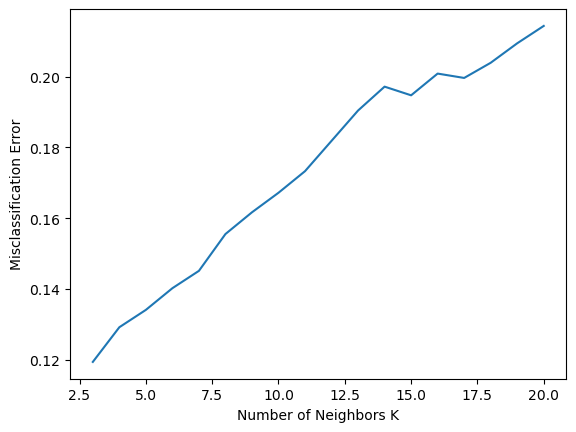

In [21]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [22]:
#take the best parameters from the result above
knn = KNeighborsClassifier(n_neighbors=3, metric= 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

The Accuracy score achieved using K-Nearest Neighbour is: 95.35 %
The Precision score achieved using K-Nearest Neighbour is: 73.33 %
The Recall score achieved using K-Nearest Neighbour is: 93.62 %
F1 Score: 0.82


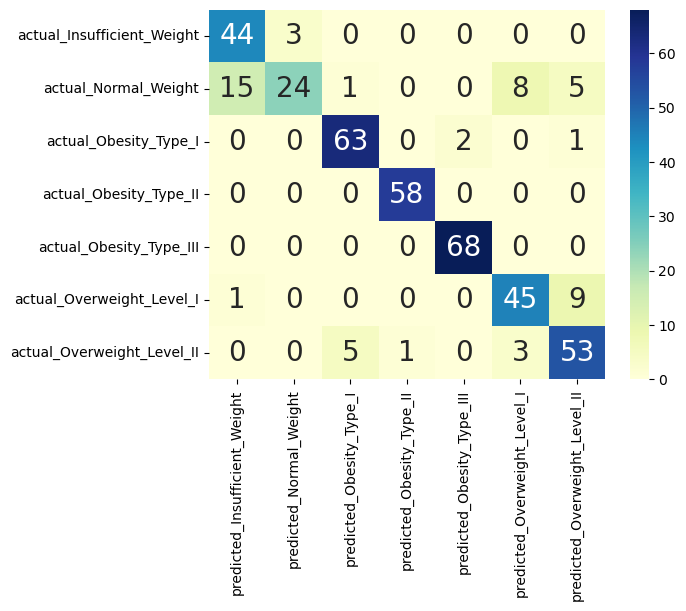

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

#use trainset to do prediction on testset
pred_knn = knn.predict(X_test)

#display confusion matrix for testset
KNN_cm=confusion_matrix(y_test,pred_knn)
sns.heatmap(KNN_cm,xticklabels=['predicted_Insufficient_Weight', 'predicted_Normal_Weight', 'predicted_Obesity_Type_I', 'predicted_Obesity_Type_II', 'predicted_Obesity_Type_III', 'predicted_Overweight_Level_I', 'predicted_Overweight_Level_II'], yticklabels=['actual_Insufficient_Weight', 'actual_Normal_Weight', 'actual_Obesity_Type_I', 'actual_Obesity_Type_II', 'actual_Obesity_Type_III', 'actual_Overweight_Level_I', 'actual_Overweight_Level_II'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu")

knn_true_pos = KNN_cm[0][0]
knn_false_neg = KNN_cm[0][1] + KNN_cm[0][2] + KNN_cm[0][3] + KNN_cm[0][4] + KNN_cm[0][5] + KNN_cm[0][6]
knn_true_neg = KNN_cm[1][1] + KNN_cm[1][2] + KNN_cm[1][3] + KNN_cm[1][4] + KNN_cm[1][5] + KNN_cm[1][6]\
     + KNN_cm[2][1] + KNN_cm[2][2] + KNN_cm[2][3] + KNN_cm[2][4] + KNN_cm[2][5] + KNN_cm[2][6] \
     + KNN_cm[3][1] + KNN_cm[3][2] + KNN_cm[3][3] + KNN_cm[3][4] + KNN_cm[3][5] + KNN_cm[3][6] \
     + KNN_cm[4][1] + KNN_cm[4][2] + KNN_cm[4][3] + KNN_cm[4][4] + KNN_cm[4][5] + KNN_cm[4][6]\
     + KNN_cm[5][1] + KNN_cm[5][2] + KNN_cm[5][3] + KNN_cm[5][4] + KNN_cm[5][5] + KNN_cm[5][6]\
     + KNN_cm[6][1] + KNN_cm[6][2] + KNN_cm[6][3] + KNN_cm[6][4] + KNN_cm[6][5] + KNN_cm[6][6]
knn_false_pos = KNN_cm[1][0] + KNN_cm[2][0] + KNN_cm[3][0] + KNN_cm[4][0] + KNN_cm[5][0] + KNN_cm[6][0]

knn_accuracy = round(((knn_true_pos + knn_true_neg) / (knn_true_pos + knn_true_neg + knn_false_pos + knn_false_neg)) * 100, 2)
knn_precision = round(((knn_true_pos) / (knn_true_pos + knn_false_pos)) * 100, 2)
knn_recall = round(((knn_true_pos) / (knn_true_pos + knn_false_neg)) * 100, 2)

knn_precision_score = round((knn_true_pos) / (knn_true_pos + knn_false_pos), 3)
knn_recall_score = round((knn_true_pos) / (knn_true_pos + knn_false_neg), 3)
knn_f1 = round(2 * (knn_precision_score * knn_recall_score) / (knn_precision_score + knn_recall_score), 2)

print('The Accuracy score achieved using K-Nearest Neighbour is: ' + str(knn_accuracy) + " %")
print('The Precision score achieved using K-Nearest Neighbour is: ' + str(knn_precision) + " %")
print('The Recall score achieved using K-Nearest Neighbour is: ' + str(knn_recall) + " %")
print('F1 Score: {}'.format(knn_f1))

### Support Vector Machine (SVM)

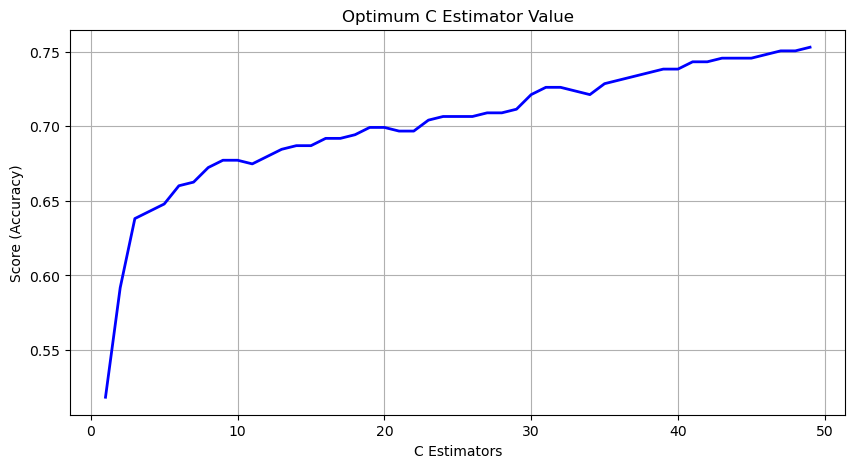

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm, metrics
#Find Optimum C value
scores = []
for i in range(1,50):
    svm = SVC(C = i,random_state=0)
    svm.fit(X_train,y_train)
    scores.append(svm.score(X_test,y_test))

plt.figure(1, figsize=(10, 5))
plt.plot(range(1,50),scores,color="blue",linewidth=2)
plt.title("Optimum C Estimator Value")
plt.xlabel("C Estimators")
plt.ylabel("Score (Accuracy)")
plt.grid(True)
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
svm = SVC(probability=True)

parameter_svm = {
  'gamma': ['auto', 'scale'],
  'C': [0.01, 0.1, 10, 100],
  'kernel': ['rbf','sigmoid','linear']
}

svm_grid = GridSearchCV(svm,parameter_svm)
svm_grid.fit(X_train, y_train)
svm_acc_test = (svm_grid.score(X_test, y_test)) * 100
svm_acc_train = (svm_grid.score(X_train, y_train)) * 100

print('SVM accuracy for test set: {:.2f}%'.format(svm_acc_test))
print('SVM accuracy for training set: {:.2f}%'.format(svm_acc_train))

# print best parameter after tuning
print(svm_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svm_grid.best_estimator_)

SVM accuracy for test set: 96.58%
SVM accuracy for training set: 98.10%
{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
SVC(C=100, gamma='auto', kernel='linear', probability=True)


In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

svm_cm = confusion_matrix(y_test,svm_grid.predict(X_test))
svm_cm

array([[47,  0,  0,  0,  0,  0,  0],
       [ 3, 48,  0,  0,  0,  2,  0],
       [ 0,  0, 62,  1,  0,  0,  3],
       [ 0,  0,  2, 56,  0,  0,  0],
       [ 0,  0,  0,  0, 68,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  2],
       [ 0,  0,  0,  0,  0,  1, 61]], dtype=int64)

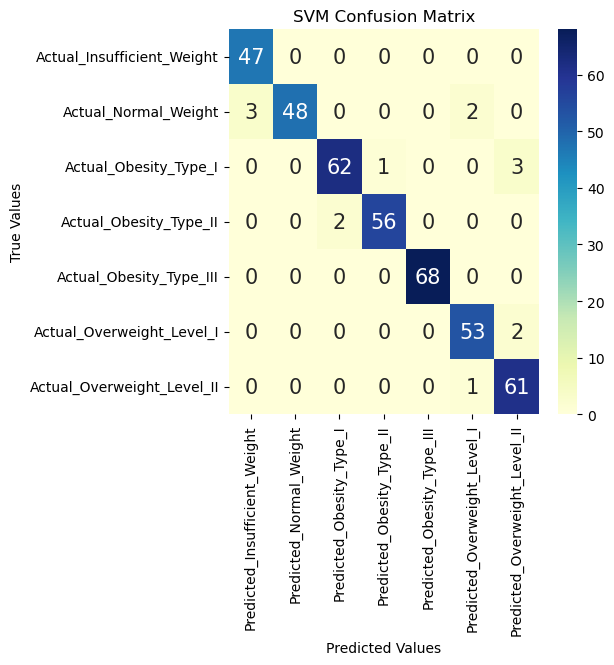

The Accuracy score achieved using Support Vector Machine is: 99.27 %
The Precision score achieved using Support Vector Machine is: 94.0 %
The Recall score achieved using Support Vector Machine is: 100.0 %
F1 Score: 0.97


In [27]:
# Visualizing Confusion Matrix using Heatmap

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))
sns.heatmap(svm_cm, xticklabels = ['Predicted_Insufficient_Weight',
                               'Predicted_Normal_Weight',
                               'Predicted_Obesity_Type_I',
                               'Predicted_Obesity_Type_II',
                               'Predicted_Obesity_Type_III',
                               'Predicted_Overweight_Level_I',
                               'Predicted_Overweight_Level_II'],
                yticklabels = ['Actual_Insufficient_Weight',
                               'Actual_Normal_Weight',
                               'Actual_Obesity_Type_I',
                               'Actual_Obesity_Type_II',
                               'Actual_Obesity_Type_III',
                               'Actual_Overweight_Level_I',
                               'Actual_Overweight_Level_II'], annot=True, fmt='d', annot_kws={'fontsize': 15}, cmap = "YlGnBu");

plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

svm_true_pos = svm_cm[0][0]
svm_false_neg = svm_cm[0][1] + svm_cm[0][2] + svm_cm[0][3] + svm_cm[0][4] + svm_cm[0][5] + svm_cm[0][6]
svm_true_neg = svm_cm[1][1] + svm_cm[1][2] + svm_cm[1][3] + svm_cm[1][4] + svm_cm[1][5] + svm_cm[1][6]\
     + svm_cm[2][1] + svm_cm[2][2] + svm_cm[2][3] + svm_cm[2][4] + svm_cm[2][5] + svm_cm[2][6] \
     + svm_cm[3][1] + svm_cm[3][2] + svm_cm[3][3] + svm_cm[3][4] + svm_cm[3][5] + svm_cm[3][6] \
     + svm_cm[4][1] + svm_cm[4][2] + svm_cm[4][3] + svm_cm[4][4] + svm_cm[4][5] + svm_cm[4][6]\
     + svm_cm[5][1] + svm_cm[5][2] + svm_cm[5][3] + svm_cm[5][4] + svm_cm[5][5] + svm_cm[5][6]\
     + svm_cm[6][1] + svm_cm[6][2] + svm_cm[6][3] + svm_cm[6][4] + svm_cm[6][5] + svm_cm[6][6]
svm_false_pos = svm_cm[1][0] + svm_cm[2][0] + svm_cm[3][0] + svm_cm[4][0] + svm_cm[5][0] + svm_cm[6][0]

svm_accuracy = round(((svm_true_pos + svm_true_neg) / (svm_true_pos + svm_true_neg + svm_false_pos + svm_false_neg)) * 100, 2)
svm_precision = round(((svm_true_pos) / (svm_true_pos + svm_false_pos)) * 100, 2)
svm_recall = round(((svm_true_pos) / (svm_true_pos + svm_false_neg)) * 100, 2)

svm_precision_score = round((svm_true_pos) / (svm_true_pos + svm_false_pos), 3)
svm_recall_score = round((svm_true_pos) / (svm_true_pos + svm_false_neg), 3)
svm_f1 = round(2 * (svm_precision_score * svm_recall_score) / (svm_precision_score + svm_recall_score), 2)

print('The Accuracy score achieved using Support Vector Machine is: ' + str(svm_accuracy) + " %")
print('The Precision score achieved using Support Vector Machine is: ' + str(svm_precision) + " %")
print('The Recall score achieved using Support Vector Machine is: ' + str(svm_recall) + " %")
print('F1 Score: {}'.format(svm_f1))

### Decision Trees

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

dt = DecisionTreeClassifier(random_state=0)

parameter_dt = {
    'max_features': ['sqrt','log2'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 10, 25, 40, 50],
    'criterion' : ['gini','entropy'],
    'min_samples_leaf' : range(2,20),
    'min_samples_split' : range(2,20)
}

dt_grid = GridSearchCV(dt,parameter_dt)

# Kfold cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(dt, X_train, y_train, cv=10)
print(score)
print("\nMean Score:", score.mean())

#Fitting
dt_grid.fit(X_train, y_train)

print(dt_grid.best_estimator_)

dt_acc_test = (dt_grid.score(X_test, y_test)) * 100
dt_acc_train = (dt_grid.score(X_train, y_train)) * 100

print('DT accuracy for test set: {:.2f}%'.format(dt_acc_test))
print('DT accuracy for training set: {:.2f}%'.format(dt_acc_train))

[0.96341463 0.89634146 0.93292683 0.9202454  0.91411043 0.92638037
 0.93865031 0.9202454  0.93865031 0.93865031]

Mean Score: 0.928961544216669
DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, random_state=0)
DT accuracy for test set: 87.29%
DT accuracy for training set: 96.26%


In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

dt_cm = confusion_matrix(y_test,dt_grid.predict(X_test))
dt_cm

array([[44,  3,  0,  0,  0,  0,  0],
       [10, 37,  0,  0,  0,  5,  1],
       [ 0,  0, 59,  2,  0,  2,  3],
       [ 0,  0,  2, 56,  0,  0,  0],
       [ 0,  0,  0,  3, 65,  0,  0],
       [ 0,  6,  0,  0,  0, 46,  3],
       [ 0,  3,  6,  0,  0,  3, 50]], dtype=int64)

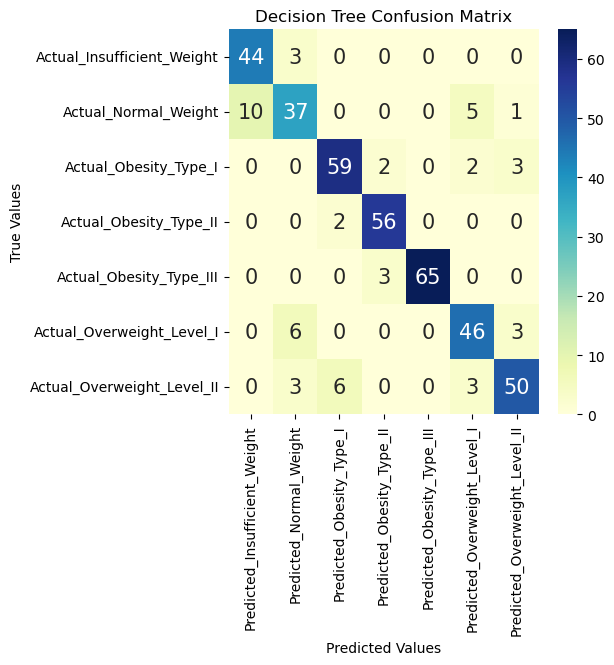

The Accuracy score achieved using Random Forest is: 96.82 %
The Precision score achieved using Random Forest is: 81.48 %
The Recall score achieved using Random Forest is: 93.62 %
F1 Score: 0.87


In [30]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))

sns.heatmap(dt_cm, xticklabels = ['Predicted_Insufficient_Weight',
                               'Predicted_Normal_Weight',
                               'Predicted_Obesity_Type_I',
                               'Predicted_Obesity_Type_II',
                               'Predicted_Obesity_Type_III',
                               'Predicted_Overweight_Level_I',
                               'Predicted_Overweight_Level_II'],
                yticklabels = ['Actual_Insufficient_Weight',
                               'Actual_Normal_Weight',
                               'Actual_Obesity_Type_I',
                               'Actual_Obesity_Type_II',
                               'Actual_Obesity_Type_III',
                               'Actual_Overweight_Level_I',
                               'Actual_Overweight_Level_II'], annot=True, fmt='d', annot_kws={'fontsize': 15}, cmap = "YlGnBu");

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

dt_true_pos = dt_cm[0][0]
dt_false_neg = dt_cm[0][1] + dt_cm[0][2] + dt_cm[0][3] + dt_cm[0][4] + dt_cm[0][5] + dt_cm[0][6]
dt_true_neg = dt_cm[1][1] + dt_cm[1][2] + dt_cm[1][3] + dt_cm[1][4] + dt_cm[1][5] + dt_cm[1][6]\
     + dt_cm[2][1] + dt_cm[2][2] + dt_cm[2][3] + dt_cm[2][4] + dt_cm[2][5] + dt_cm[2][6] \
     + dt_cm[3][1] + dt_cm[3][2] + dt_cm[3][3] + dt_cm[3][4] + dt_cm[3][5] + dt_cm[3][6] \
     + dt_cm[4][1] + dt_cm[4][2] + dt_cm[4][3] + dt_cm[4][4] + dt_cm[4][5] + dt_cm[4][6]\
     + dt_cm[5][1] + dt_cm[5][2] + dt_cm[5][3] + dt_cm[5][4] + dt_cm[5][5] + dt_cm[5][6]\
     + dt_cm[6][1] + dt_cm[6][2] + dt_cm[6][3] + dt_cm[6][4] + dt_cm[6][5] + dt_cm[6][6]
dt_false_pos = dt_cm[1][0] + dt_cm[2][0] + dt_cm[3][0] + dt_cm[4][0] + dt_cm[5][0] + dt_cm[6][0]

dt_accuracy = round(((dt_true_pos + dt_true_neg) / (dt_true_pos + dt_true_neg + dt_false_pos + dt_false_neg)) * 100, 2)
dt_precision = round(((dt_true_pos) / (dt_true_pos + dt_false_pos)) * 100, 2)
dt_recall = round(((dt_true_pos) / (dt_true_pos + dt_false_neg)) * 100, 2)

dt_precision_score = round((dt_true_pos) / (dt_true_pos + dt_false_pos), 3)
dt_recall_score = round((dt_true_pos) / (dt_true_pos + dt_false_neg), 3)
dt_f1 = round(2 * (dt_precision_score * dt_recall_score) / (dt_precision_score + dt_recall_score), 2)

print('The Accuracy score achieved using Random Forest is: ' + str(dt_accuracy) + " %")
print('The Precision score achieved using Random Forest is: ' + str(dt_precision) + " %")
print('The Recall score achieved using Random Forest is: ' + str(dt_recall) + " %")
print('F1 Score: {}'.format(dt_f1))


### Artificial Neural Network

In [31]:
### Import Libraries
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.utils import np_utils

In [32]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create the ANN model
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, pd.get_dummies(y_train), epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, pd.get_dummies(y_test), verbose=0)
print(f'Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}')

# Generate the confusion matrix
y_pred = model.predict(X_test)
classes_y = np.argmax(y_pred, axis=1)
ann_cm = confusion_matrix(y_test, classes_y)

Epoch 1/50
52/52 [==============================] - 0s 766us/step - loss: 1.9885 - accuracy: 0.2333
Epoch 2/50
52/52 [==============================] - 0s 677us/step - loss: 1.5738 - accuracy: 0.3362
Epoch 3/50
52/52 [==============================] - 0s 630us/step - loss: 1.4465 - accuracy: 0.3962
Epoch 4/50
52/52 [==============================] - 0s 628us/step - loss: 1.3906 - accuracy: 0.4434
Epoch 5/50
52/52 [==============================] - 0s 638us/step - loss: 1.3313 - accuracy: 0.4568
Epoch 6/50
52/52 [==============================] - 0s 638us/step - loss: 1.1812 - accuracy: 0.5401
Epoch 7/50
52/52 [==============================] - 0s 639us/step - loss: 1.2104 - accuracy: 0.5217
Epoch 8/50
52/52 [==============================] - 0s 628us/step - loss: 1.0107 - accuracy: 0.6093
Epoch 9/50
52/52 [==============================] - 0s 618us/step - loss: 0.9778 - accuracy: 0.6271
Epoch 10/50
52/52 [==============================] - 0s 621us/step - loss: 0.9567 - accuracy: 0.6320

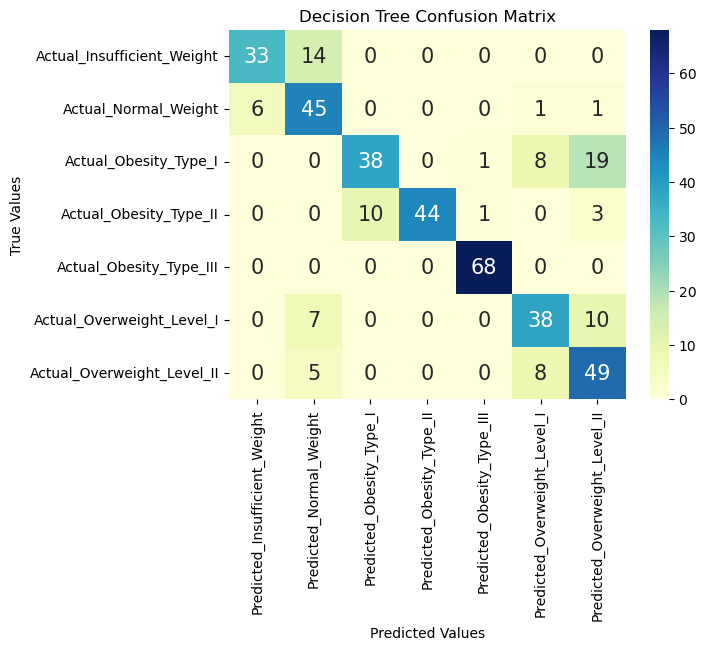

The Accuracy score achieved using Artificial Neural Network is: 95.11 %
The Precision score achieved using Artificial Neural Network is: 84.62 %
The Recall score achieved using Artificial Neural Network is: 70.21 %
F1 Score: 0.67


In [33]:
sns.heatmap(ann_cm, xticklabels = ['Predicted_Insufficient_Weight',
                               'Predicted_Normal_Weight',
                               'Predicted_Obesity_Type_I',
                               'Predicted_Obesity_Type_II',
                               'Predicted_Obesity_Type_III',
                               'Predicted_Overweight_Level_I',
                               'Predicted_Overweight_Level_II'],
                yticklabels = ['Actual_Insufficient_Weight',
                               'Actual_Normal_Weight',
                               'Actual_Obesity_Type_I',
                               'Actual_Obesity_Type_II',
                               'Actual_Obesity_Type_III',
                               'Actual_Overweight_Level_I',
                               'Actual_Overweight_Level_II'], annot=True, fmt='d', annot_kws={'fontsize': 15}, cmap = "YlGnBu");

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

ann_true_pos = ann_cm[0][0]
ann_false_neg = ann_cm[0][1] + ann_cm[0][2] + ann_cm[0][3] + ann_cm[0][4] + ann_cm[0][5] + ann_cm[0][6]
ann_true_neg = ann_cm[1][1] + ann_cm[1][2] + ann_cm[1][3] + ann_cm[1][4] + ann_cm[1][5] + ann_cm[1][6]\
     + ann_cm[2][1] + ann_cm[2][2] + ann_cm[2][3] + ann_cm[2][4] + ann_cm[2][5] + ann_cm[2][6] \
     + ann_cm[3][1] + ann_cm[3][2] + ann_cm[3][3] + ann_cm[3][4] + ann_cm[3][5] + ann_cm[3][6] \
     + ann_cm[4][1] + ann_cm[4][2] + ann_cm[4][3] + ann_cm[4][4] + ann_cm[4][5] + ann_cm[4][6]\
     + ann_cm[5][1] + ann_cm[5][2] + ann_cm[5][3] + ann_cm[5][4] + ann_cm[5][5] + ann_cm[5][6]\
     + ann_cm[6][1] + ann_cm[6][2] + ann_cm[6][3] + ann_cm[6][4] + ann_cm[6][5] + ann_cm[6][6]
ann_false_pos = ann_cm[1][0] + ann_cm[2][0] + ann_cm[3][0] + ann_cm[4][0] + ann_cm[5][0] + ann_cm[6][0]

ann_accuracy = round(((ann_true_pos + ann_true_neg) / (ann_true_pos + ann_true_neg + ann_false_pos + ann_false_neg)) * 100, 2)
ann_precision = round(((ann_true_pos) / (ann_true_pos + ann_false_pos)) * 100, 2)
ann_recall = round(((ann_true_pos) / (ann_true_pos + ann_false_neg)) * 100, 2)

ann_precision_score = round((ann_true_pos) / (ann_true_pos + ann_false_pos), 3)
ann_recall_score = round((ann_true_pos) / (ann_true_pos + ann_false_neg), 3)
ann_f1 = round(2 * (ann_precision_score * ann_recall_score) / (ann_precision_score + dt_recall_score), 2)

print('The Accuracy score achieved using Artificial Neural Network is: ' + str(ann_accuracy) + " %")
print('The Precision score achieved using Artificial Neural Network is: ' + str(ann_precision) + " %")
print('The Recall score achieved using Artificial Neural Network is: ' + str(ann_recall) + " %")
print('F1 Score: {}'.format(ann_f1))

### Naive Bayes

In [34]:
# Naive Bayes
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

# .values --> give the values in a numpy array (shape:(n,1))
# .ravel --> convert the array shape to (n, ) (to fatten it)
# Train the model
nb.fit(X_train, y_train.values.ravel())

# Predict the data
Y_Pred_nb = nb.predict(X_test)

# Determine the total number of test samples whose true class
# labels do not match the predicted class labels
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != Y_Pred_nb).sum()))

Number of mislabeled points out of a total 409 points : 178


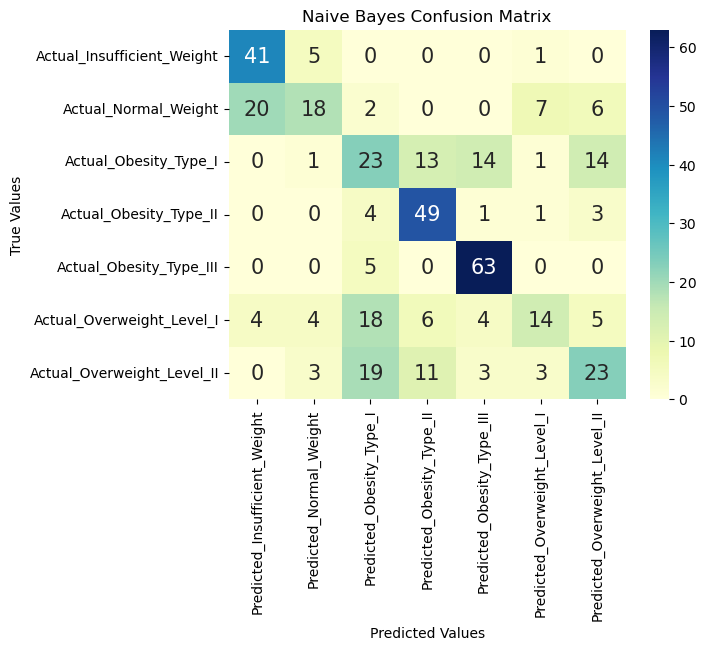

In [35]:
nb_cm = confusion_matrix(y_test, Y_Pred_nb)
sns.heatmap(nb_cm, xticklabels = ['Predicted_Insufficient_Weight',
                               'Predicted_Normal_Weight',
                               'Predicted_Obesity_Type_I',
                               'Predicted_Obesity_Type_II',
                               'Predicted_Obesity_Type_III',
                               'Predicted_Overweight_Level_I',
                               'Predicted_Overweight_Level_II'],
                yticklabels = ['Actual_Insufficient_Weight',
                               'Actual_Normal_Weight',
                               'Actual_Obesity_Type_I',
                               'Actual_Obesity_Type_II',
                               'Actual_Obesity_Type_III',
                               'Actual_Overweight_Level_I',
                               'Actual_Overweight_Level_II'], annot=True, fmt='d', annot_kws={'fontsize': 15}, cmap = "YlGnBu");

plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [36]:
nb_true_pos = nb_cm[0][0]
nb_false_neg = nb_cm[0][1] + nb_cm[0][2] + nb_cm[0][3] + nb_cm[0][4] + nb_cm[0][5] + nb_cm[0][6]
nb_true_neg = nb_cm[1][1] + nb_cm[1][2] + nb_cm[1][3] + nb_cm[1][4] + nb_cm[1][5] + nb_cm[1][6]\
     + nb_cm[2][1] + nb_cm[2][2] + nb_cm[2][3] + nb_cm[2][4] + nb_cm[2][5] + nb_cm[2][6]\
     + nb_cm[3][1] + nb_cm[3][2] + nb_cm[3][3] + nb_cm[3][4] + nb_cm[3][5] + nb_cm[3][6]\
     + nb_cm[4][1] + nb_cm[4][2] + nb_cm[4][3] + nb_cm[4][4] + nb_cm[4][5] + nb_cm[4][6]\
     + nb_cm[5][1] + nb_cm[5][2] + nb_cm[5][3] + nb_cm[5][4] + nb_cm[5][5] + nb_cm[5][6]\
     + nb_cm[6][1] + nb_cm[6][2] + nb_cm[6][3] + nb_cm[6][4] + nb_cm[6][5] + nb_cm[6][6]
nb_false_pos = nb_cm[1][0] + nb_cm[2][0] + nb_cm[3][0] + nb_cm[4][0] + nb_cm[5][0] + nb_cm[6][0]

In [37]:
nb_accuracy = round(((nb_true_pos + nb_true_neg) / (nb_true_pos + nb_true_neg + nb_false_pos + nb_false_neg)) * 100, 2)
nb_precision = round(((nb_true_pos) / (nb_true_pos + nb_false_pos)) * 100, 2)
nb_recall = round(((nb_true_pos) / (nb_true_pos + nb_false_neg)) * 100, 2)

nb_precision_score = round((nb_true_pos) / (nb_true_pos + nb_false_pos), 3)
nb_recall_score = round((nb_true_pos) / (nb_true_pos + nb_false_neg), 3)
nb_f1 = round(2 * (nb_precision_score * nb_recall_score) / (nb_precision_score + nb_recall_score), 2)

print('The Accuracy score achieved using Naive Bayes is: ' + str(nb_accuracy) + " %")
print('The Precision score achieved using Naive Bayes is: ' + str(nb_precision) + " %")
print('The Recall score achieved using Naive Bayes is: ' + str(nb_recall) + " %")
print('F1 Score: {}'.format(nb_f1))

The Accuracy score achieved using Naive Bayes is: 92.67 %
The Precision score achieved using Naive Bayes is: 63.08 %
The Recall score achieved using Naive Bayes is: 87.23 %
F1 Score: 0.73


### Random Forest

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
rf_n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2210, num = 100)]

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
rf_max_depth = [3, 10, 25, 40, 50]

# Minimum number of samples required to split a node
rf_min_samples_split = range(2, 20)

# Minimum number of samples required at each leaf node
rf_min_samples_leaf = range(2, 20)

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the random grid
rf_random_grid = { 'n_estimators': rf_n_estimators,
                'max_features': rf_max_features,
                'max_depth': rf_max_depth,
                'min_samples_split': rf_min_samples_split,
                'min_samples_leaf': rf_min_samples_leaf,
                'bootstrap': rf_bootstrap}

print(rf_random_grid)

{'n_estimators': [10, 32, 54, 76, 98, 121, 143, 165, 187, 210, 232, 254, 276, 298, 321, 343, 365, 387, 410, 432, 454, 476, 498, 521, 543, 565, 587, 610, 632, 654, 676, 698, 721, 743, 765, 787, 810, 832, 854, 876, 898, 921, 943, 965, 987, 1010, 1032, 1054, 1076, 1098, 1121, 1143, 1165, 1187, 1210, 1232, 1254, 1276, 1298, 1321, 1343, 1365, 1387, 1410, 1432, 1454, 1476, 1498, 1521, 1543, 1565, 1587, 1610, 1632, 1654, 1676, 1698, 1721, 1743, 1765, 1787, 1810, 1832, 1854, 1876, 1898, 1921, 1943, 1965, 1987, 2010, 2032, 2054, 2076, 2098, 2121, 2143, 2165, 2187, 2210], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 10, 25, 40, 50], 'min_samples_split': range(2, 20), 'min_samples_leaf': range(2, 20), 'bootstrap': [True, False]}


In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)

# Random search of parameters, using 10 fold cross validation
# Search across 100 different combinations, and use all available cores
# More n_iter(controls the number of different combinations to try) will cover a wider search space
# More cv folds reduce the chance of overfitting
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_random_grid, n_iter = 100, cv = 10, verbose = 2, n_jobs = 4)

# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 2121,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

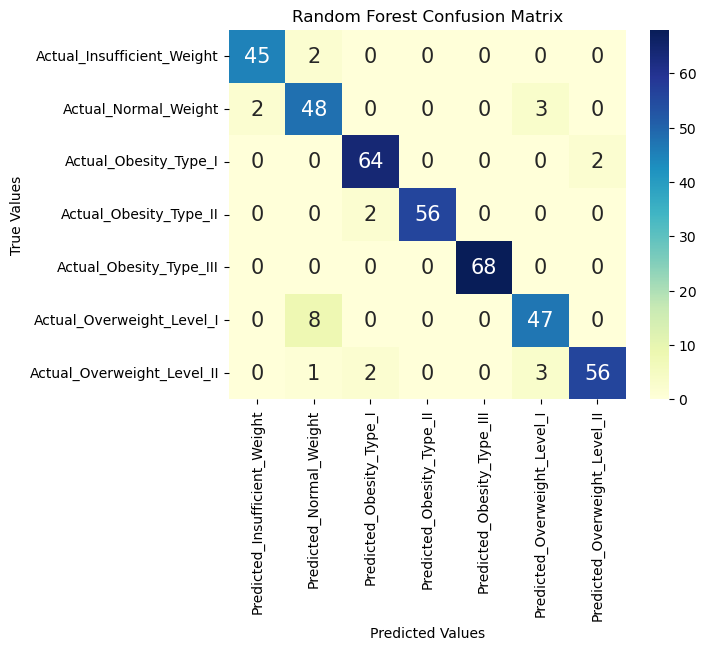

The Accuracy score achieved using Random Forest is: 99.02 %
The Precision score achieved using Random Forest is: 95.74 %
The Recall score achieved using Random Forest is: 95.74 %
F1 Score: 0.957


In [42]:
from sklearn.metrics import confusion_matrix

rf_cm = confusion_matrix(y_test, rf_random.predict(X_test))

sns.heatmap(rf_cm, xticklabels = ['Predicted_Insufficient_Weight',
                               'Predicted_Normal_Weight',
                               'Predicted_Obesity_Type_I',
                               'Predicted_Obesity_Type_II',
                               'Predicted_Obesity_Type_III',
                               'Predicted_Overweight_Level_I',
                               'Predicted_Overweight_Level_II'],
                yticklabels = ['Actual_Insufficient_Weight',
                               'Actual_Normal_Weight',
                               'Actual_Obesity_Type_I',
                               'Actual_Obesity_Type_II',
                               'Actual_Obesity_Type_III',
                               'Actual_Overweight_Level_I',
                               'Actual_Overweight_Level_II'], annot=True, fmt='d', annot_kws={'fontsize': 15}, cmap = "YlGnBu");
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

rf_true_pos = rf_cm[0][0]
rf_false_neg = rf_cm[0][1] + rf_cm[0][2] + rf_cm[0][3] + rf_cm[0][4] + rf_cm[0][5] + rf_cm[0][6]
rf_true_neg = rf_cm[1][1] + rf_cm[1][2] + rf_cm[1][3] + rf_cm[1][4] + rf_cm[1][5] + rf_cm[1][6]\
     + rf_cm[2][1] + rf_cm[2][2] + rf_cm[2][3] + rf_cm[2][4] + rf_cm[2][5] + rf_cm[2][6] \
     + rf_cm[3][1] + rf_cm[3][2] + rf_cm[3][3] + rf_cm[3][4] + rf_cm[3][5] + rf_cm[3][6] \
     + rf_cm[4][1] + rf_cm[4][2] + rf_cm[4][3] + rf_cm[4][4] + rf_cm[4][5] + rf_cm[4][6]\
     + rf_cm[5][1] + rf_cm[5][2] + rf_cm[5][3] + rf_cm[5][4] + rf_cm[5][5] + rf_cm[5][6]\
     + rf_cm[6][1] + rf_cm[6][2] + rf_cm[6][3] + rf_cm[6][4] + rf_cm[6][5] + rf_cm[6][6]
rf_false_pos = rf_cm[1][0] + rf_cm[2][0] + rf_cm[3][0] + rf_cm[4][0] + rf_cm[5][0] + rf_cm[6][0]

rf_accuracy = round(((rf_true_pos + rf_true_neg) / (rf_true_pos + rf_true_neg + rf_false_pos + rf_false_neg)) * 100, 2)
rf_precision = round(((rf_true_pos) / (rf_true_pos + rf_false_pos)) * 100, 2)
rf_recall = round(((rf_true_pos) / (rf_true_pos + rf_false_neg)) * 100, 2)

rf_precision_score = round((rf_true_pos) / (rf_true_pos + rf_false_pos), 3)
rf_recall_score = round((rf_true_pos) / (rf_true_pos + rf_false_neg), 3)
rf_f1 = round(2 * (rf_precision_score * rf_recall_score) / (rf_precision_score + rf_recall_score), 4)

print('The Accuracy score achieved using Random Forest is: ' + str(rf_accuracy) + " %")
print('The Precision score achieved using Random Forest is: ' + str(rf_precision) + " %")
print('The Recall score achieved using Random Forest is: ' + str(rf_recall) + " %")
print('F1 Score: {}'.format(rf_f1))

### Chapter 7 Evaluation

In [43]:
import plotly
import plotly.express as px 
import plotly.io as pio 
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 

def model_report(acc, pre, recall, f1, name):

    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [acc],
                       "Recall"          : [recall],
                       "Precision"       : [pre],
                       "F1 Score"        : [f1],
                      })
    return df

model1 = model_report(knn_accuracy, knn_precision, knn_recall, knn_f1, "K-Nearest Neighbour (KNN)")
model2 = model_report(svm_accuracy, svm_precision, svm_recall, svm_f1, "Support Vector Machine (SVM)")
model3 = model_report(dt_accuracy, dt_precision, dt_recall, dt_f1, "Decision Tree")
model4 = model_report(ann_accuracy, ann_precision, ann_recall, ann_f1, "Artificial Neural Network (ANN)")
model5 = model_report(nb_accuracy, nb_precision, nb_recall, nb_f1, "Naive Bayes")
model6 = model_report(rf_accuracy, rf_precision, rf_recall, rf_f1, "Random Forest")

# Concat all models
# model_performances = pd.concat([model1, model2, model3,model5,model6],axis = 0).reset_index()

model_performances = pd.concat([model1, model2, model3, model4, model5, model6],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index", axis = 1)

table  = ff.create_table(np.round(model_performances, 7))
# model_performances
py.iplot(table)

In [44]:
name = ['KNN','Decision Tree','Random Forest','SVM', 'Naive Bayes','Artificial Neutral Network']

acc_all = [(al)for al in [knn_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, nb_accuracy, ann_accuracy]]
pre_all = [(al)for al in [knn_precision, dt_precision, rf_precision,svm_precision, nb_precision,ann_precision]]
rec_all = [(al)for al in [knn_recall, dt_recall, rf_recall,svm_recall, nb_recall,ann_recall]]
f1_all = [(al)for al in  [knn_f1 * 100,   dt_f1 * 100, rf_f1 * 100,svm_f1 *100, nb_f1 * 100, ann_f1 *100 ]]

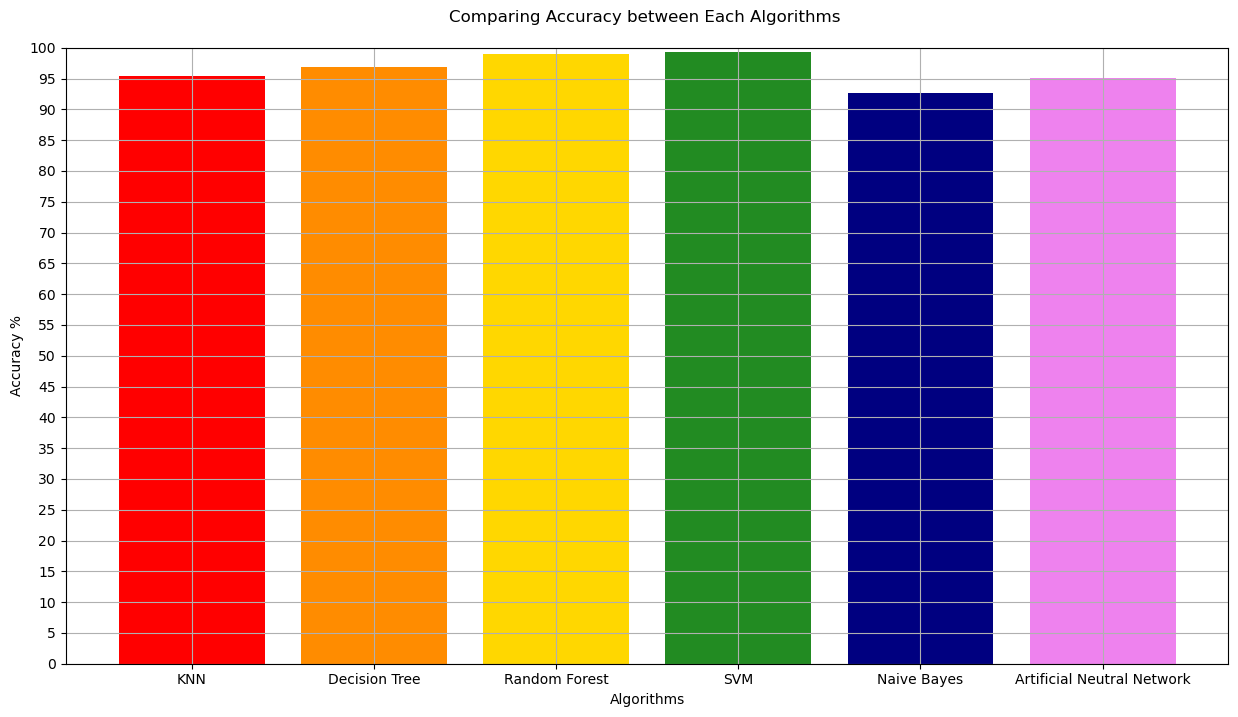

[95.35, 96.82, 99.02, 99.27, 92.67, 95.11]


In [45]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.bar(x=name, height=acc_all, color=['red','darkorange', 'gold','forestgreen','navy','violet','purple'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Comparing Accuracy between Each Algorithms \n")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.show()
print(acc_all)


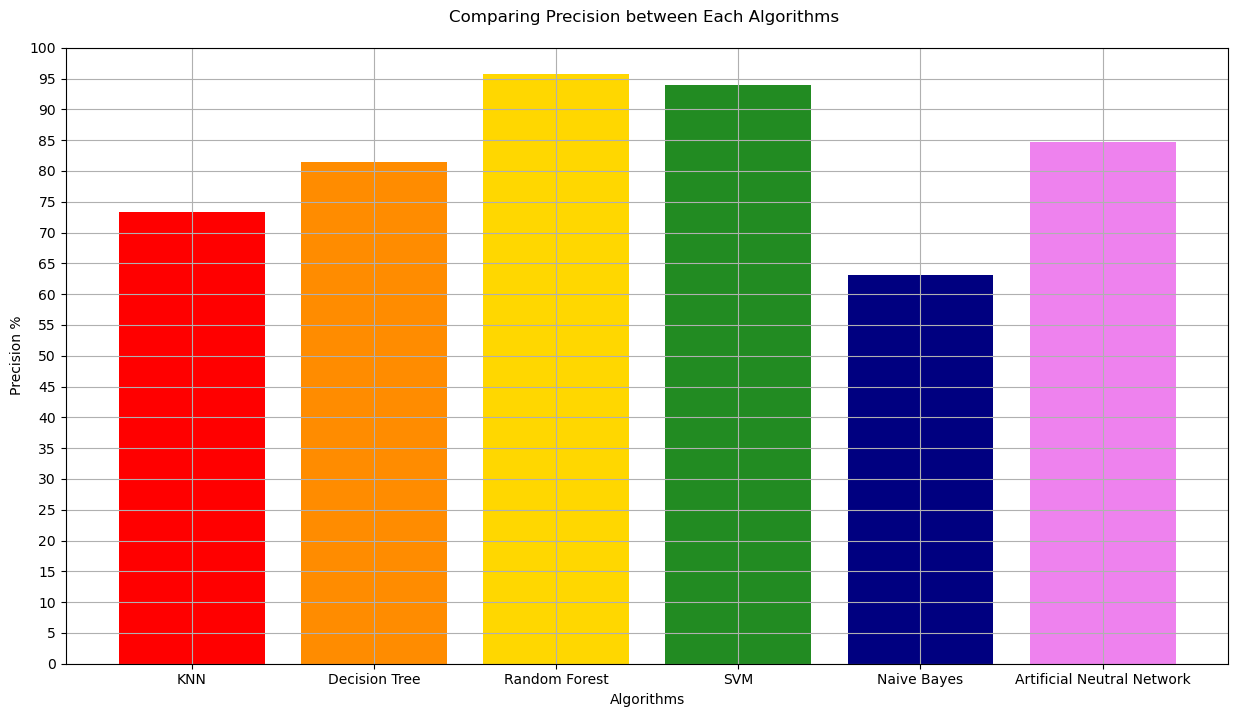

[73.33, 81.48, 95.74, 94.0, 63.08, 84.62]


In [46]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.bar(x=name, height=pre_all, color=['red','darkorange', 'gold','forestgreen','navy','violet','purple'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Comparing Precision between Each Algorithms \n")
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
plt.show()
print(pre_all)

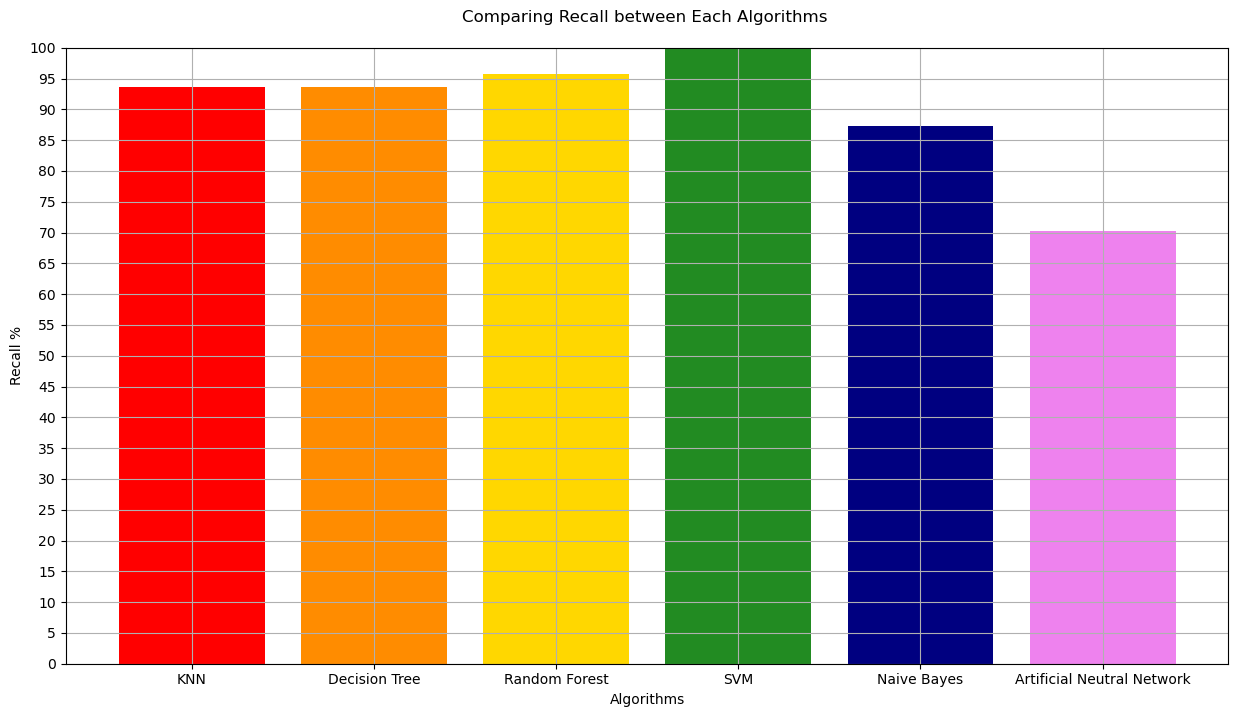

[93.62, 93.62, 95.74, 100.0, 87.23, 70.21]


In [47]:
plt.figure(figsize=(15,8))
# plt.grid(True)
plt.grid('on')
plt.bar(x=name, height=rec_all, color=['red','darkorange', 'gold','forestgreen','navy','violet','purple'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Comparing Recall between Each Algorithms \n")
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
plt.show()

print(rec_all)

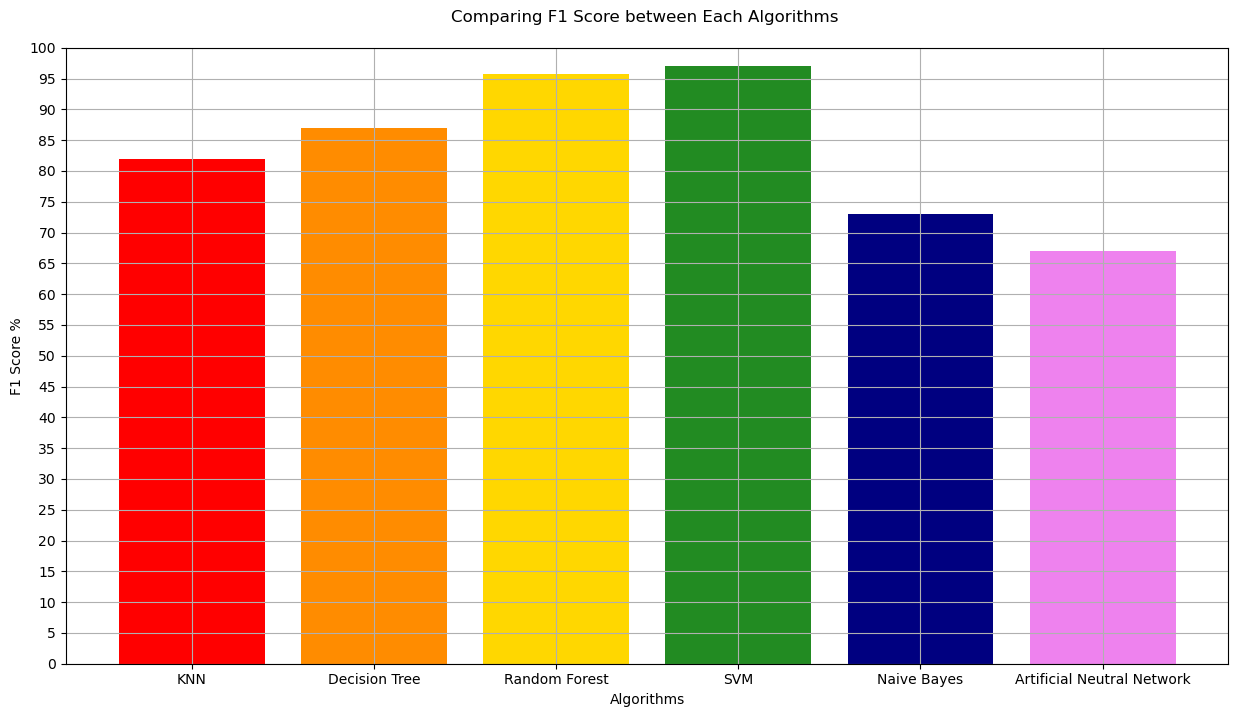

[82.0, 87.0, 95.7, 97.0, 73.0, 67.0]


In [48]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.bar(x=name, height=f1_all, color=['red','darkorange', 'gold','forestgreen','navy','violet','purple'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Comparing F1 Score between Each Algorithms \n")
plt.ylabel("F1 Score %")
plt.xlabel("Algorithms")
plt.show()
print(f1_all)

### Chapter 8 Savings Model Using Pickle

In [49]:
# Import Pickle
import pickle as pk
pk.dump(svm_grid, open("svm-model.pkl", "wb"))

In [50]:
# Model Testing
loaded_model = pk.load(open("svm-model.pkl", 'rb'))

In [51]:
# Create a new data point as a list of lists

new_data = [[0,27,1.8,87,0,0,3,3,1,0,2,0,2,0,2,2]]

# Convert the list of lists to a pandas DataFrame with column names
new_data_df = pd.DataFrame(new_data, columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'])

# Make a prediction using the loaded model and the new data DataFrame
predicted_label = loaded_model.predict(new_data_df)

# Print the predicted label
print(predicted_label)

[5]
